<a href="https://colab.research.google.com/github/zzhining/python_ml_dl/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM(Suport Vector Machine)


**[참고자료]** 
- [SVM 개념](https://www.notion.so/SVM-88a8db59158d4886b244d523c7214f19)
- [sklearn - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [sklearn - SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?)

# [실습 01] Binary classification

## 실습 목표
---
- 주어진 데이터를 예측하기 위해서 어떠한 AI 기술을 활용해야하는지 이해합니다.
- 의사결정트리 및 SVM 모델을 이해합니다.

## 실습 목차
---

1. **데이터 읽기:** 주어진 데이터('Dataset.csv')를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 변수 시각화를 통하여 분포 파악

4. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

3. **머신러닝 모델 수행:** 분류 모델을 사용하여 학습 수행, 평가 및 예측 수행

## 실습 개요
---
머신러닝 프로세스 과정을 이해하고, 데이터 전처리, 학습, 평가 단계를 구현합니다.

## 1. 데이터 읽기
---

### 1.1 라이브러리 불러오기
---
머신러닝에 필요한 주요 라이브러리를 불러옵니다.

 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [2]:
# data.csv 파일을 읽어오기
df = pd.read_csv('data.csv')

# 데이터프레임의 상위 5개 항목 출력
df.head()

,a1,a2,a3,a4,a5,a6,target
0,28,0.06,500,0.048,200,0.2,0
1,35,0.32,800,0.034,130,1.9,1
2,14,0.21,800,0.018,120,2.8,0
3,9,0.05,800,0.018,80,2.3,1
4,31,0.29,400,0.015,170,0.2,1


7개의 컬럼을 갖는 데이터프레임을 불러왔습니다.


### 1.3 데이터 탐색
---

`df`의 컬럼별 요약정보(info)를 확인합니다. 각 컬럼별 데이터 타입과 결측치 여부를 확인합니다.

In [3]:
# 컬럼별 요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      1000 non-null   int64  
 1   a2      1000 non-null   float64
 2   a3      1000 non-null   int64  
 3   a4      1000 non-null   float64
 4   a5      1000 non-null   int64  
 5   a6      1000 non-null   float64
 6   target  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


## 2. 데이터 전처리
----
머신러닝을 하기 위한 데이터 전처리를 수행합니다. 독립변수(X)와 종속변수(Y)로 각 컬럼을 나누고, 학습용 데이터와 테스트용 데이터로 분할하는 데이터 분할을 수행합니다. 독립변수(X)에 대해서 정규화를 수행합니다.

### 2.1 종속변수, 독립변수 할당
-----

In [4]:
# 전체 컬럼에서 0~5번 컬럼에 해당하는 값을 독립변수(X)로 할당
X = df.iloc[:, :6]

# target 컬럼을 종속변수(y)로 할당
y = df['target']

# X에 할당된 값 확인
X.head()

,a1,a2,a3,a4,a5,a6
0,28,0.06,500,0.048,200,0.2
1,35,0.32,800,0.034,130,1.9
2,14,0.21,800,0.018,120,2.8
3,9,0.05,800,0.018,80,2.3
4,31,0.29,400,0.015,170,0.2


X에 `target`를 제외한 모든 컬럼이 할당되었습니다.

### 2.2 정규화(스케일링)
-----
컬럼별 데이터 크기 및 분포의 차이가 있으므로 StandardScaler를 사용하여 정규화를 수행하겠습니다.


In [5]:
# sklearn에서 제공하는 StandardScaler를 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler() 객체 선언
sc = StandardScaler()

# X를 StandardScaler를 사용하여 z-점수 정규화(StandardScaler)수행
X = sc.fit_transform(X)

# 변환된 결과 출력
print(X)

for i in range(len(X[0])):
    print('{} 컬럼의 평균: {:.2f}, 표준편차:{}'.format(i, X[:, i].mean(), X[:, i].std()))

[[-0.07821    -2.16118423 -1.26280634  1.90247583  1.82401334 -2.14029285]
 [ 0.58862314  0.3558732  -0.08371545  0.6037942   0.28234546  0.26516652]
 [-1.41187628 -0.70903572 -0.08371545 -0.88041339  0.06210719  1.53864501]
 ...
 [-2.26923318 -1.28989512 -0.47674575 -0.04554662  1.60377507 -1.99879524]
 [ 0.11231375  1.42078211 -0.08371545  0.97484609 -1.69979895 -1.99879524]
 [ 0.39809939 -2.06437433  1.48840573 -1.5297542  -2.14027549 -2.14029285]]
0 컬럼의 평균: -0.00, 표준편차:1.0
1 컬럼의 평균: 0.00, 표준편차:1.0
2 컬럼의 평균: 0.00, 표준편차:1.0
3 컬럼의 평균: -0.00, 표준편차:1.0
4 컬럼의 평균: -0.00, 표준편차:1.0
5 컬럼의 평균: -0.00, 표준편차:1.0


데이터의 범위가 평균 0, 표준편차 1을 기준으로 변경되었습니다.

### 2.3 학습용, 테스트용 데이터 분할
-----
train_test_split()을 사용하여 전처리가 완료된 데이터를 분할합니다.

In [6]:
# sklearn에서 제공하는 train_test_split 임포트
from sklearn.model_selection import train_test_split

# 데이터 분할
# - 테스트용 데이터의 비율을 20%로 설정
# - 동일한 샘플링 결과를 얻기 위해 random_state 설정
# - y의 비율을 기준으로 샘플링
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1, stratify = y)

# 분할된 변수의 결과 출력
print('X: {}, X_train: {}, X_test:{}'.format(X.shape, X_train.shape, X_test.shape))
print('y: {}, y_train: {}, y_test:{}'.format(y.shape, y_train.shape, y_test.shape))

X: (1000, 6), X_train: (700, 6), X_test:(300, 6)
y: (1000,), y_train: (700,), y_test:(300,)


1000개의 데이터가 학습용 데이터 700개, 테스트용 데이터 300개로 분할되었습니다.

In [7]:
# y값을 기준으로 계층적(stratified) 샘플링이 적용되어 데이터가 분할되었는지 여부를 확인
print(y.value_counts()/len(y) * 100)
print(y_train.value_counts()/len(y_train) * 100)
print(y_test.value_counts()/len(y_test) * 100)

0    58.8
1    41.2
Name: target, dtype: float64
0    58.857143
1    41.142857
Name: target, dtype: float64
0    58.666667
1    41.333333
Name: target, dtype: float64


0과 1의 비율이 학습용 데이터셋과 테스트용 데이터 셋 모두 약 59:41로 기존 데이터의 비율과 동일하게 분할되었습니다.

## 3. 머신러닝 모델 수행
-----

다음의 알고리즘을 사용하여 분류(classifier) 모델을 생성하는 머신러닝 학습을 수행합니다.

- 의사결정나무
- 서포트벡터머신

### 3.1 의사결정나무(DecisionTree)
---



#### 3.1.1 학습

DecisionTreeClassifier 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [8]:
# DecisionTreeClassifier 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier

# 기본 매개변수를 사용하는 DecisionTreeClassifier 생성
tree = DecisionTreeClassifier(random_state=42)

# 생성한 tree 객체를 학습용 데이터를 사용하여 학습
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 3.1.2 학습결과 시각화
-----

In [9]:
df.columns[:len(df.columns)-1]

Index(['a1', 'a2', 'a3', 'a4', 'a5', 'a6'], dtype='object')

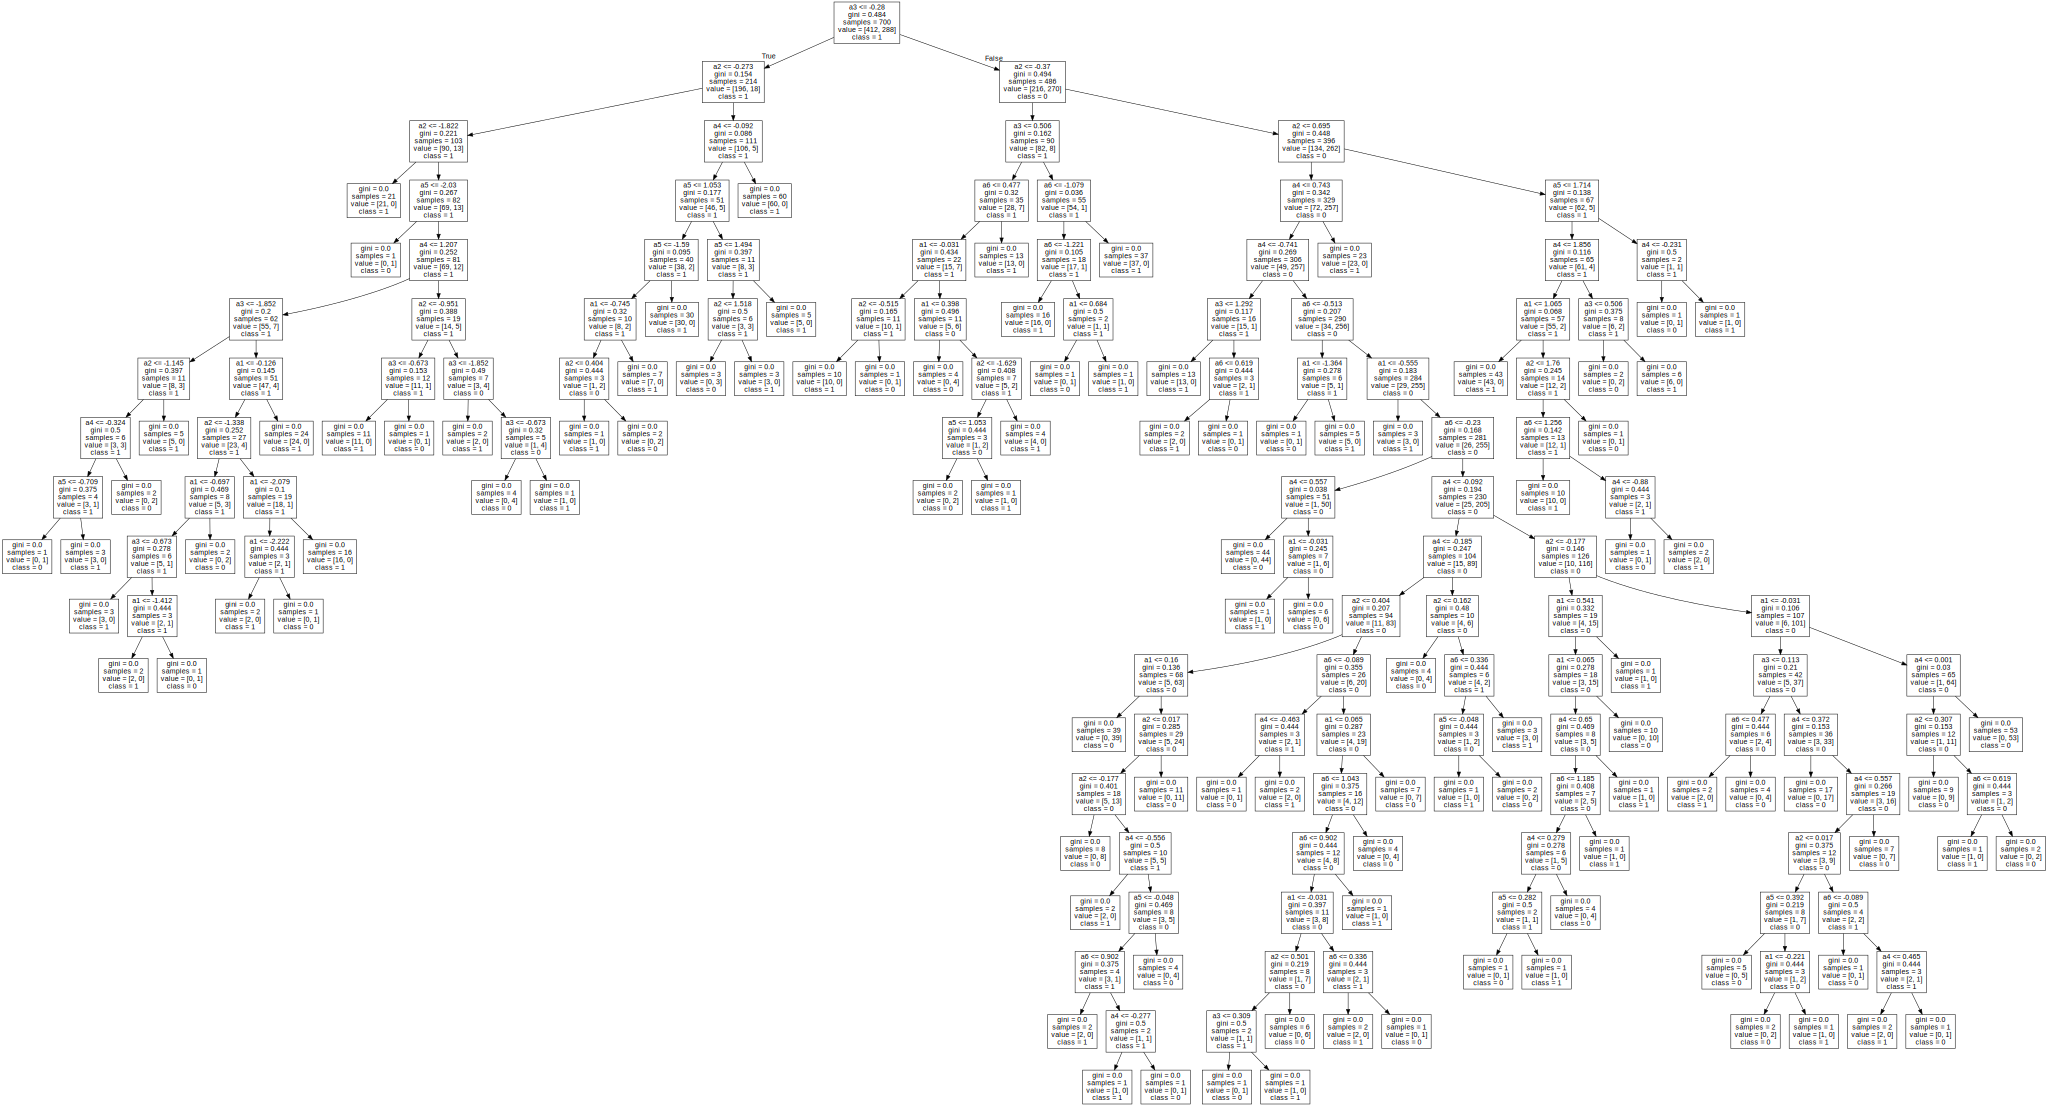

In [10]:
import graphviz
from sklearn.tree import export_graphviz

tree_img = export_graphviz(tree,feature_names=df.columns[:len(df.columns)-1],
                      class_names=["1","0"])
graphviz.Source(tree_img)

#### 3.1.3 평가

In [11]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.863


기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 86.3%입니다.

#### 3.1.4 예측
-----

In [12]:
# X_test를 입력으로하여 결과값 예측
y_pred = tree.predict(X_test)
print('예측값:' , y_pred)
print('실제값:' , y_test.values)

예측값: [1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0
 0 1 0 0]
실제값: [1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0
 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 1 0 

예측값과 실제값의 차이가 존재하는 항목이 보입니다. 차이가 나는 항목에 대해 산점도를 그려 확인해보겠습니다.

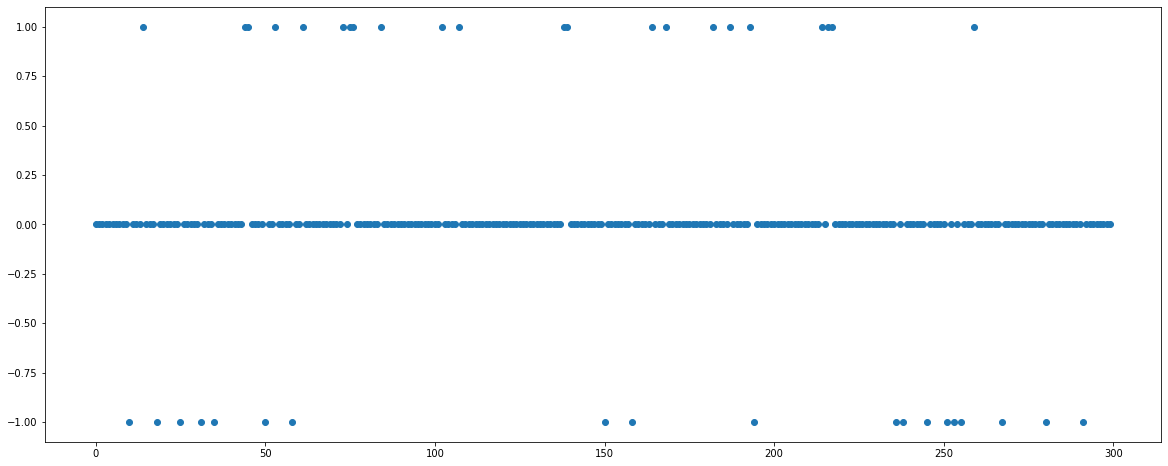

In [13]:
plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(y_pred)), y_pred - y_test)

실제값과 예측값의 차이가 0으로 대부분의 값이 0에 분포합니다. 실제값이 1인데 0으로 예측한 항목은 아래 부분에, 실제값이 0인데 1로 예측한 항목은 그래프 윗부분에 표시되었습니다.

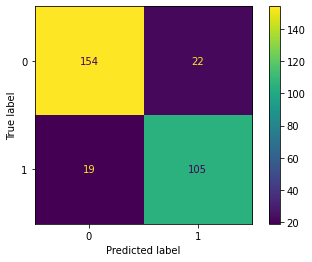

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 22건, 실제값이 1인데 예측을 0으로 하는 경우가 19건이 존재합니다.

### 3.2 서포트벡터머신(SVM)
----------



#### 3.2.1 학습
-----
SVC 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [15]:
# SVC 라이브러리 불러오기
from sklearn.svm import SVC
# 기본 매개변수를 사용하여 SVC 객체 생성
classifier = SVC()
# 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
classifier.fit(X_train, y_train)

SVC()

#### 3.2.2 평가
-----

In [16]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(classifier.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(classifier.score(X_test, y_test)))

train 세트 정확도: 0.904
test 세트 정확도: 0.877


기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 87.7%입니다.

#### 3.1.3 예측
-----

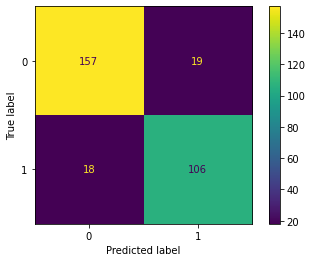

In [17]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 19건, 실제값이 1인데 예측을 0으로 하는 경우가 18건 존재합니다.

## 4. 모델 성능 개선
-----

모델 생성시 주요 매개변수를 변화시켜보고, 그에 따른 정확도 변화를 확인합니다.

### 4.1 DecisionTree 매개변수 변경
-----

#### 4.1.1 max_depth

In [18]:
#  변경할 max_depth 
max_depth=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_depth:
    # max_depth 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=1, max_depth = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_depth = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-1], test_scores[i-1]))

max_depth = 1, train 세트 정확도: 0.666, test 세트 정확도: 0.673
max_depth = 2, train 세트 정확도: 0.771, test 세트 정확도: 0.760
max_depth = 3, train 세트 정확도: 0.853, test 세트 정확도: 0.813
max_depth = 4, train 세트 정확도: 0.887, test 세트 정확도: 0.833
max_depth = 5, train 세트 정확도: 0.910, test 세트 정확도: 0.850
max_depth = 6, train 세트 정확도: 0.933, test 세트 정확도: 0.863
max_depth = 7, train 세트 정확도: 0.949, test 세트 정확도: 0.867
max_depth = 8, train 세트 정확도: 0.954, test 세트 정확도: 0.860
max_depth = 9, train 세트 정확도: 0.960, test 세트 정확도: 0.863
max_depth = 10, train 세트 정확도: 0.963, test 세트 정확도: 0.860


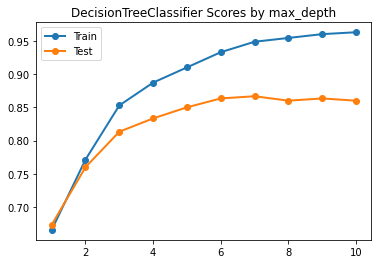

In [19]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_depth')
plt.plot(max_depth, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_depth, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_depth`의 값을 크게 설정할 수록 학습용 데이터의 성능은 증가하고 테스트용 데이터의 정확도는 증가하다가 어느 시점부터 감소함을 확인할 수 있습니다.

#### 4.1.2 min_samples_split

In [20]:
#  변경할 min_samples_split 
min_samples_split =[2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in min_samples_split:
    # min_samples_split 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=1, min_samples_split = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("min_samples_split = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-2], test_scores[i-2]))

min_samples_split = 2, train 세트 정확도: 1.000, test 세트 정확도: 0.867
min_samples_split = 3, train 세트 정확도: 0.993, test 세트 정확도: 0.843
min_samples_split = 4, train 세트 정확도: 0.977, test 세트 정확도: 0.837
min_samples_split = 5, train 세트 정확도: 0.973, test 세트 정확도: 0.860
min_samples_split = 6, train 세트 정확도: 0.971, test 세트 정확도: 0.857
min_samples_split = 7, train 세트 정확도: 0.959, test 세트 정확도: 0.867
min_samples_split = 8, train 세트 정확도: 0.951, test 세트 정확도: 0.860
min_samples_split = 9, train 세트 정확도: 0.941, test 세트 정확도: 0.843
min_samples_split = 10, train 세트 정확도: 0.941, test 세트 정확도: 0.843


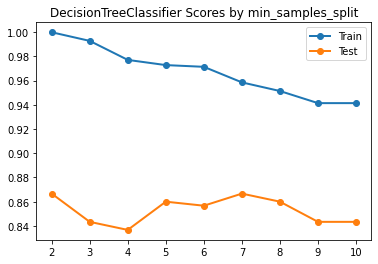

In [21]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by min_samples_split')
plt.plot(min_samples_split, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(min_samples_split, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`min_samples_split`의 값을 크게 설정할 수록 학습용 데이터의 성능은 떨어지고 테스트용 데이터의 정확도는 약간 증가함을 확인할 수 있습니다.

#### 4.1.3 min_samples_leaf

In [22]:
#  변경할 min_samples_leaf 
min_samples_leaf=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in min_samples_leaf:
    # min_samples_leaf 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=1, min_samples_leaf = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("min_samples_leaf = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-1], test_scores[i-1]))

min_samples_leaf = 1, train 세트 정확도: 1.000, test 세트 정확도: 0.867
min_samples_leaf = 2, train 세트 정확도: 0.961, test 세트 정확도: 0.847
min_samples_leaf = 3, train 세트 정확도: 0.944, test 세트 정확도: 0.853
min_samples_leaf = 4, train 세트 정확도: 0.926, test 세트 정확도: 0.853
min_samples_leaf = 5, train 세트 정확도: 0.927, test 세트 정확도: 0.820
min_samples_leaf = 6, train 세트 정확도: 0.921, test 세트 정확도: 0.817
min_samples_leaf = 7, train 세트 정확도: 0.910, test 세트 정확도: 0.817
min_samples_leaf = 8, train 세트 정확도: 0.910, test 세트 정확도: 0.837
min_samples_leaf = 9, train 세트 정확도: 0.907, test 세트 정확도: 0.837
min_samples_leaf = 10, train 세트 정확도: 0.907, test 세트 정확도: 0.837


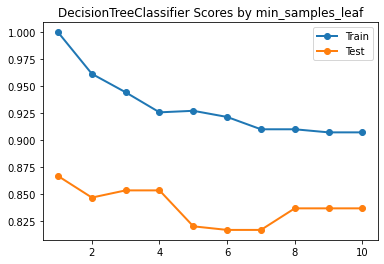

In [23]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by min_samples_leaf')
plt.plot(min_samples_leaf, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(min_samples_leaf, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`min_samples_leaf`의 값을 크게 설정할 수록 학습용 데이터의 성능은 떨어지고 테스트용 데이터의 정확도는 약간 증가함을 확인할 수 있습니다.

#### 4.1.4 max_features

In [24]:
#  변경할 max_features, 선언된 변수에서 10을 나눠주어 비율로 설정
max_features=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_features:
    # max_features 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=1, max_features = i/10)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_features = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i/10, train_scores[i-1], test_scores[i-1]))

max_features = 0.1, train 세트 정확도: 1.000, test 세트 정확도: 0.783
max_features = 0.2, train 세트 정확도: 1.000, test 세트 정확도: 0.783
max_features = 0.3, train 세트 정확도: 1.000, test 세트 정확도: 0.783
max_features = 0.4, train 세트 정확도: 1.000, test 세트 정확도: 0.790
max_features = 0.5, train 세트 정확도: 1.000, test 세트 정확도: 0.807
max_features = 0.6, train 세트 정확도: 1.000, test 세트 정확도: 0.807
max_features = 0.7, train 세트 정확도: 1.000, test 세트 정확도: 0.810
max_features = 0.8, train 세트 정확도: 1.000, test 세트 정확도: 0.810
max_features = 0.9, train 세트 정확도: 1.000, test 세트 정확도: 0.810
max_features = 1.0, train 세트 정확도: 1.000, test 세트 정확도: 0.867


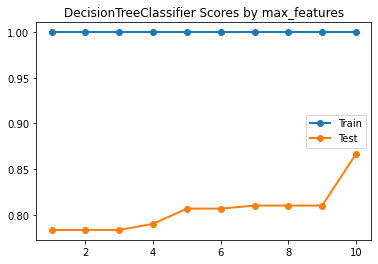

In [25]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_features')
plt.plot(max_features, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_features, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_features`의 비율을 다르게 설정하더라도 모델의 성능 변화가 크게 없음을 확인할 수 있습니다. 

#### 4.1.5 max_leaf_nodes

In [26]:
#  변경할 max_leaf_nodes
max_leaf_nodes=[2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_leaf_nodes:
    # max_features 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=1, max_leaf_nodes = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_leaf_nodes = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-2], test_scores[i-2]))

max_leaf_nodes = 2, train 세트 정확도: 0.666, test 세트 정확도: 0.673
max_leaf_nodes = 3, train 세트 정확도: 0.771, test 세트 정확도: 0.760
max_leaf_nodes = 4, train 세트 정확도: 0.853, test 세트 정확도: 0.813
max_leaf_nodes = 5, train 세트 정확도: 0.886, test 세트 정확도: 0.833
max_leaf_nodes = 6, train 세트 정확도: 0.906, test 세트 정확도: 0.860
max_leaf_nodes = 7, train 세트 정확도: 0.911, test 세트 정확도: 0.877
max_leaf_nodes = 8, train 세트 정확도: 0.916, test 세트 정확도: 0.883
max_leaf_nodes = 9, train 세트 정확도: 0.917, test 세트 정확도: 0.887
max_leaf_nodes = 10, train 세트 정확도: 0.917, test 세트 정확도: 0.887


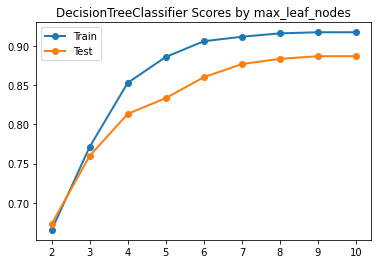

In [27]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_leaf_nodes')
plt.plot(max_leaf_nodes, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_leaf_nodes, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_leaf_nodes`의 값을 크게 설정할 수록 학습용 데이터와 테스트용 데이터의 정확도가 모두 높아지고 있음을 확인할 수 있습니다.

### 4.2 SVC 매개변수 변경
-----

#### 4.2.1 C
-----

In [28]:
#  변경할 C 
C=[1.0, 2.0, 3.0, 4.0, 5.0]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in C:
    # C를 변경하여 모델 생성
    tuned_svc = SVC(C = i)

    # 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
    tuned_svc.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_svc.score(X_train, y_train))
    test_scores.append(tuned_svc.score(X_test, y_test))
    
    # 정확도 출력
    print("C = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[int(i)-1], test_scores[int(i)-1]))

C = 1.0, train 세트 정확도: 0.904, test 세트 정확도: 0.877
C = 2.0, train 세트 정확도: 0.909, test 세트 정확도: 0.880
C = 3.0, train 세트 정확도: 0.909, test 세트 정확도: 0.880
C = 4.0, train 세트 정확도: 0.911, test 세트 정확도: 0.880
C = 5.0, train 세트 정확도: 0.911, test 세트 정확도: 0.877


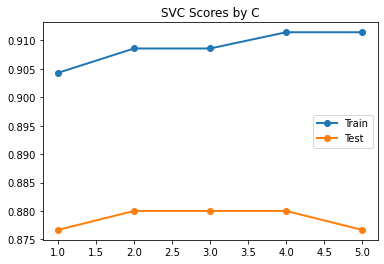

In [29]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('SVC Scores by C')
plt.plot(C, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(C, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`C`를 2~4로 설정했을 때 테스트 셋의 정확도가 가장 높은 모델이 만들어졌습니다.

#### 4.2.2 kernel
-----

In [30]:
#  변경할 kernel
kernel=['linear', 'poly', 'rbf', 'sigmoid']

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in kernel:
    # kernel를 변경하여 모델 생성
    tuned_svc = SVC(kernel = i)

    # 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
    tuned_svc.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_svc.score(X_train, y_train))
    test_scores.append(tuned_svc.score(X_test, y_test))
    
    # 정확도 출력
    print("C = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, tuned_svc.score(X_train, y_train), tuned_svc.score(X_test, y_test)))

C = linear, train 세트 정확도: 0.696, test 세트 정확도: 0.717
C = poly, train 세트 정확도: 0.751, test 세트 정확도: 0.667
C = rbf, train 세트 정확도: 0.904, test 세트 정확도: 0.877
C = sigmoid, train 세트 정확도: 0.673, test 세트 정확도: 0.677


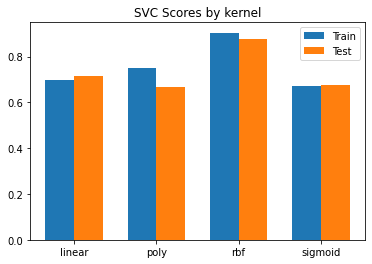

In [31]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('SVC Scores by kernel')
index = np.arange(len(kernel))
bar_width = 0.35
plt.bar(index, train_scores, bar_width, label='Train')
plt.bar(index + bar_width, test_scores, bar_width, label='Test')
plt.xticks(index+ bar_width/2, kernel)
plt.legend()

`kernel`을 rbf로 설정하였을 때 가장 좋은 성능을 보이는 모델이 생성되었습니다.

-----
# [실습 02] breast cancer data
-----
 
위에서 학습한 내용을 유방암 데이터 셋을 사용하여 복습해봅니다.

In [32]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
